In [1]:
# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
import re
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel


In [3]:
# Loading Data Set

In [4]:
df = pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
#Shape of Data Set
df.shape

(99999, 226)

In [6]:
#List of columns
df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [7]:
# Find columns with total recharge info
tot_rech_cols = [col for col in df.columns if 'total_rech_' in col]
print(tot_rech_cols)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']


In [8]:
#Derive Total Data Recharge Amounts

df["total_rech_data_amt_6"] = df["total_rech_data_6"]  * df['av_rech_amt_data_6']
df["total_rech_data_amt_7"] = df["total_rech_data_7"]  * df['av_rech_amt_data_7']
df["total_rech_data_amt_8"] = df["total_rech_data_8"]  * df['av_rech_amt_data_8']
df["total_rech_data_amt_9"] = df["total_rech_data_9"]  * df['av_rech_amt_data_9']

In [9]:
df.shape

(99999, 230)

In [10]:
# Drop total_rech_data_* and av_rech_amt_data_*
drop_col = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
df.drop(drop_col, axis=1, inplace=True)

In [11]:
#Average of Recharge Amount in 6th and 7th Month
av_rech_amt_6n7 = (df["total_rech_amt_6"].fillna(0) + df["total_rech_data_amt_6"].fillna(0) + 
df["total_rech_amt_7"].fillna(0) + df["total_rech_data_amt_7"].fillna(0))/2.0

#70th Percentile of Avg Recharge Amount
pc70_6n7 = np.percentile(av_rech_amt_6n7, 70.0)
print('70 percentile of 6th and 7th months avg recharge amount: ', pc70_6n7)

df_high_val_cust = df[av_rech_amt_6n7 >= pc70_6n7]
print('Dataframe Shape after Filtering HIgh Value Customers: ', df_high_val_cust.shape)

70 percentile of 6th and 7th months avg recharge amount:  478.0
Dataframe Shape after Filtering HIgh Value Customers:  (30001, 222)


In [12]:
# Data Cleaning and EDA

In [13]:
# Checking null value 
df.isnull().sum()*100/len(df.index)

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [14]:
#Remove Data which has only 1 unique Value

#List of columns with only 1 unqiue value
col_list = df_high_val_cust.loc[:,df_high_val_cust.apply(pd.Series.nunique) == 1]
col_list.head(5)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
7,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
8,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#Remove Columns with only 1 unique value
df_high_val_cust = df_high_val_cust.loc[:,df_high_val_cust.apply(pd.Series.nunique) != 1]
df_high_val_cust.shape

(30001, 206)

In [16]:
# aug_vbc_3g jul_vbc_3g jun_vbc_3g sep_vbc_3g

df_high_val_cust.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [17]:
# Checking Missing values the column which have null value more than 30%
columns = df_high_val_cust.columns
percent_missing = df_high_val_cust.isnull().sum() * 100 / len(df_high_val_cust)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

drop_col = missing_value_df.loc[(missing_value_df["column_name"].str.contains('_9')==False) & (missing_value_df["percent_missing"] > 30.0)]["column_name"]
drop_col

date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
arpu_3g_6                                  arpu_3g_6
arpu_3g_7                                  arpu_3g_7
arpu_3g_8                                  arpu_3g_8
arpu_2g_6                                  arpu_2g_6
arpu_2g_7                                  arpu_2g_7
arpu_2g_8                                  arpu_2g_8
night_pck_user_6                    night_pck_

In [18]:
df_high_val_cust.drop(drop_col, axis=1, inplace=True)
df_high_val_cust.shape

(30001, 179)

In [19]:
#Drop Rows with all Null Values
df_high_val_cust = df_high_val_cust.dropna(how='all',axis=0) 
df_high_val_cust.shape

(30001, 179)

In [20]:
# Skewness check of colums

In [21]:
# We will check skewness of ech column
for col_name in df_high_val_cust.columns:
    if (len(df_high_val_cust[col_name].unique()) <= 8):
        print(df_high_val_cust[col_name].value_counts())
        print(f"\n{35 * '-'}")

0.0    14952
1.0      268
Name: night_pck_user_9, dtype: int64

-----------------------------------
0    25394
1     4021
2      551
3       28
4        7
Name: monthly_2g_6, dtype: int64

-----------------------------------
0    25241
1     4071
2      649
3       33
4        5
5        2
Name: monthly_2g_7, dtype: int64

-----------------------------------
0    25854
1     3737
2      370
3       30
4        8
5        2
Name: monthly_2g_8, dtype: int64

-----------------------------------
0    26445
1     3175
2      346
3       30
4        5
Name: monthly_2g_9, dtype: int64

-----------------------------------
1.0    13564
0.0     1656
Name: fb_user_9, dtype: int64

-----------------------------------


In [22]:
# Drop Highly Correlated Columns

In [23]:
#Find Highly correlated data and drop Highly Correlated Columns
cor = df_high_val_cust.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

C:\Users\melwi\AppData\Local\Temp\ipykernel_15300\2466219851.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df_high_val_cust.corr()


monthly_3g_6           vol_3g_mb_6         0.601308
total_ic_mou_7         loc_ic_t2t_mou_7    0.601684
arpu_2g_9              count_rech_3g_9     0.602386
total_og_mou_8         onnet_mou_9         0.603450
total_rech_amt_8       arpu_6              0.603673
roam_og_mou_8          roam_og_mou_7       0.604862
offnet_mou_8           offnet_mou_6        0.604877
total_ic_mou_8         loc_ic_t2t_mou_8    0.605243
std_ic_mou_6           std_ic_t2m_mou_7    0.606225
std_og_mou_9           std_og_t2m_mou_8    0.606539
arpu_2g_9              vol_3g_mb_8         0.606779
std_ic_mou_7           std_ic_t2m_mou_8    0.606866
loc_og_mou_6           loc_og_t2t_mou_7    0.607059
vbc_3g_8               vol_3g_mb_8         0.607689
std_og_mou_8           std_og_t2m_mou_9    0.608170
std_og_mou_9           offnet_mou_9        0.608690
total_rech_amt_8       total_rech_amt_6    0.609306
total_og_mou_6         std_og_t2t_mou_6    0.610417
total_rech_amt_6       arpu_8              0.610687
std_og_mou_7

In [24]:
#List of columns that need to drop and checking shape of dataset
drop_col_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','arpu_2g_9','count_rech_2g_9','count_rech_3g_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
                 
df_high_val_cust.drop(drop_col_list, axis=1, inplace=True)
df_high_val_cust.shape

(30001, 124)

In [25]:
# Tag Churner

In [26]:
df_high_val_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74


In [27]:
#churned customers (churn=1, else 0) i.e we are setting customer for 1 who left and those who exist is 0
df_high_val_cust['churn'] = np.where(df_high_val_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 
                                   1,
                                   0)

In [28]:
df_high_val_cust['churn'].head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [29]:
#Remove All 9th Month related columns
drop_cols = [col for col in df_high_val_cust.columns if '_9' in col]
print(drop_cols)

df_high_val_cust.drop(drop_cols, axis=1, inplace=True)

df_high_val_cust.shape

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9', 'total_rech_data_amt_9']


(30001, 87)

In [30]:
# Function to create dist plot
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [31]:
# function to create Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "Telecom Churn"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [32]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [33]:
# Distribution graphs (histogram/bar graph) of sampled columns:

In [ ]:
#Checking Correlation matrix:

C:\Users\melwi\AppData\Local\Temp\ipykernel_15300\3661242002.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


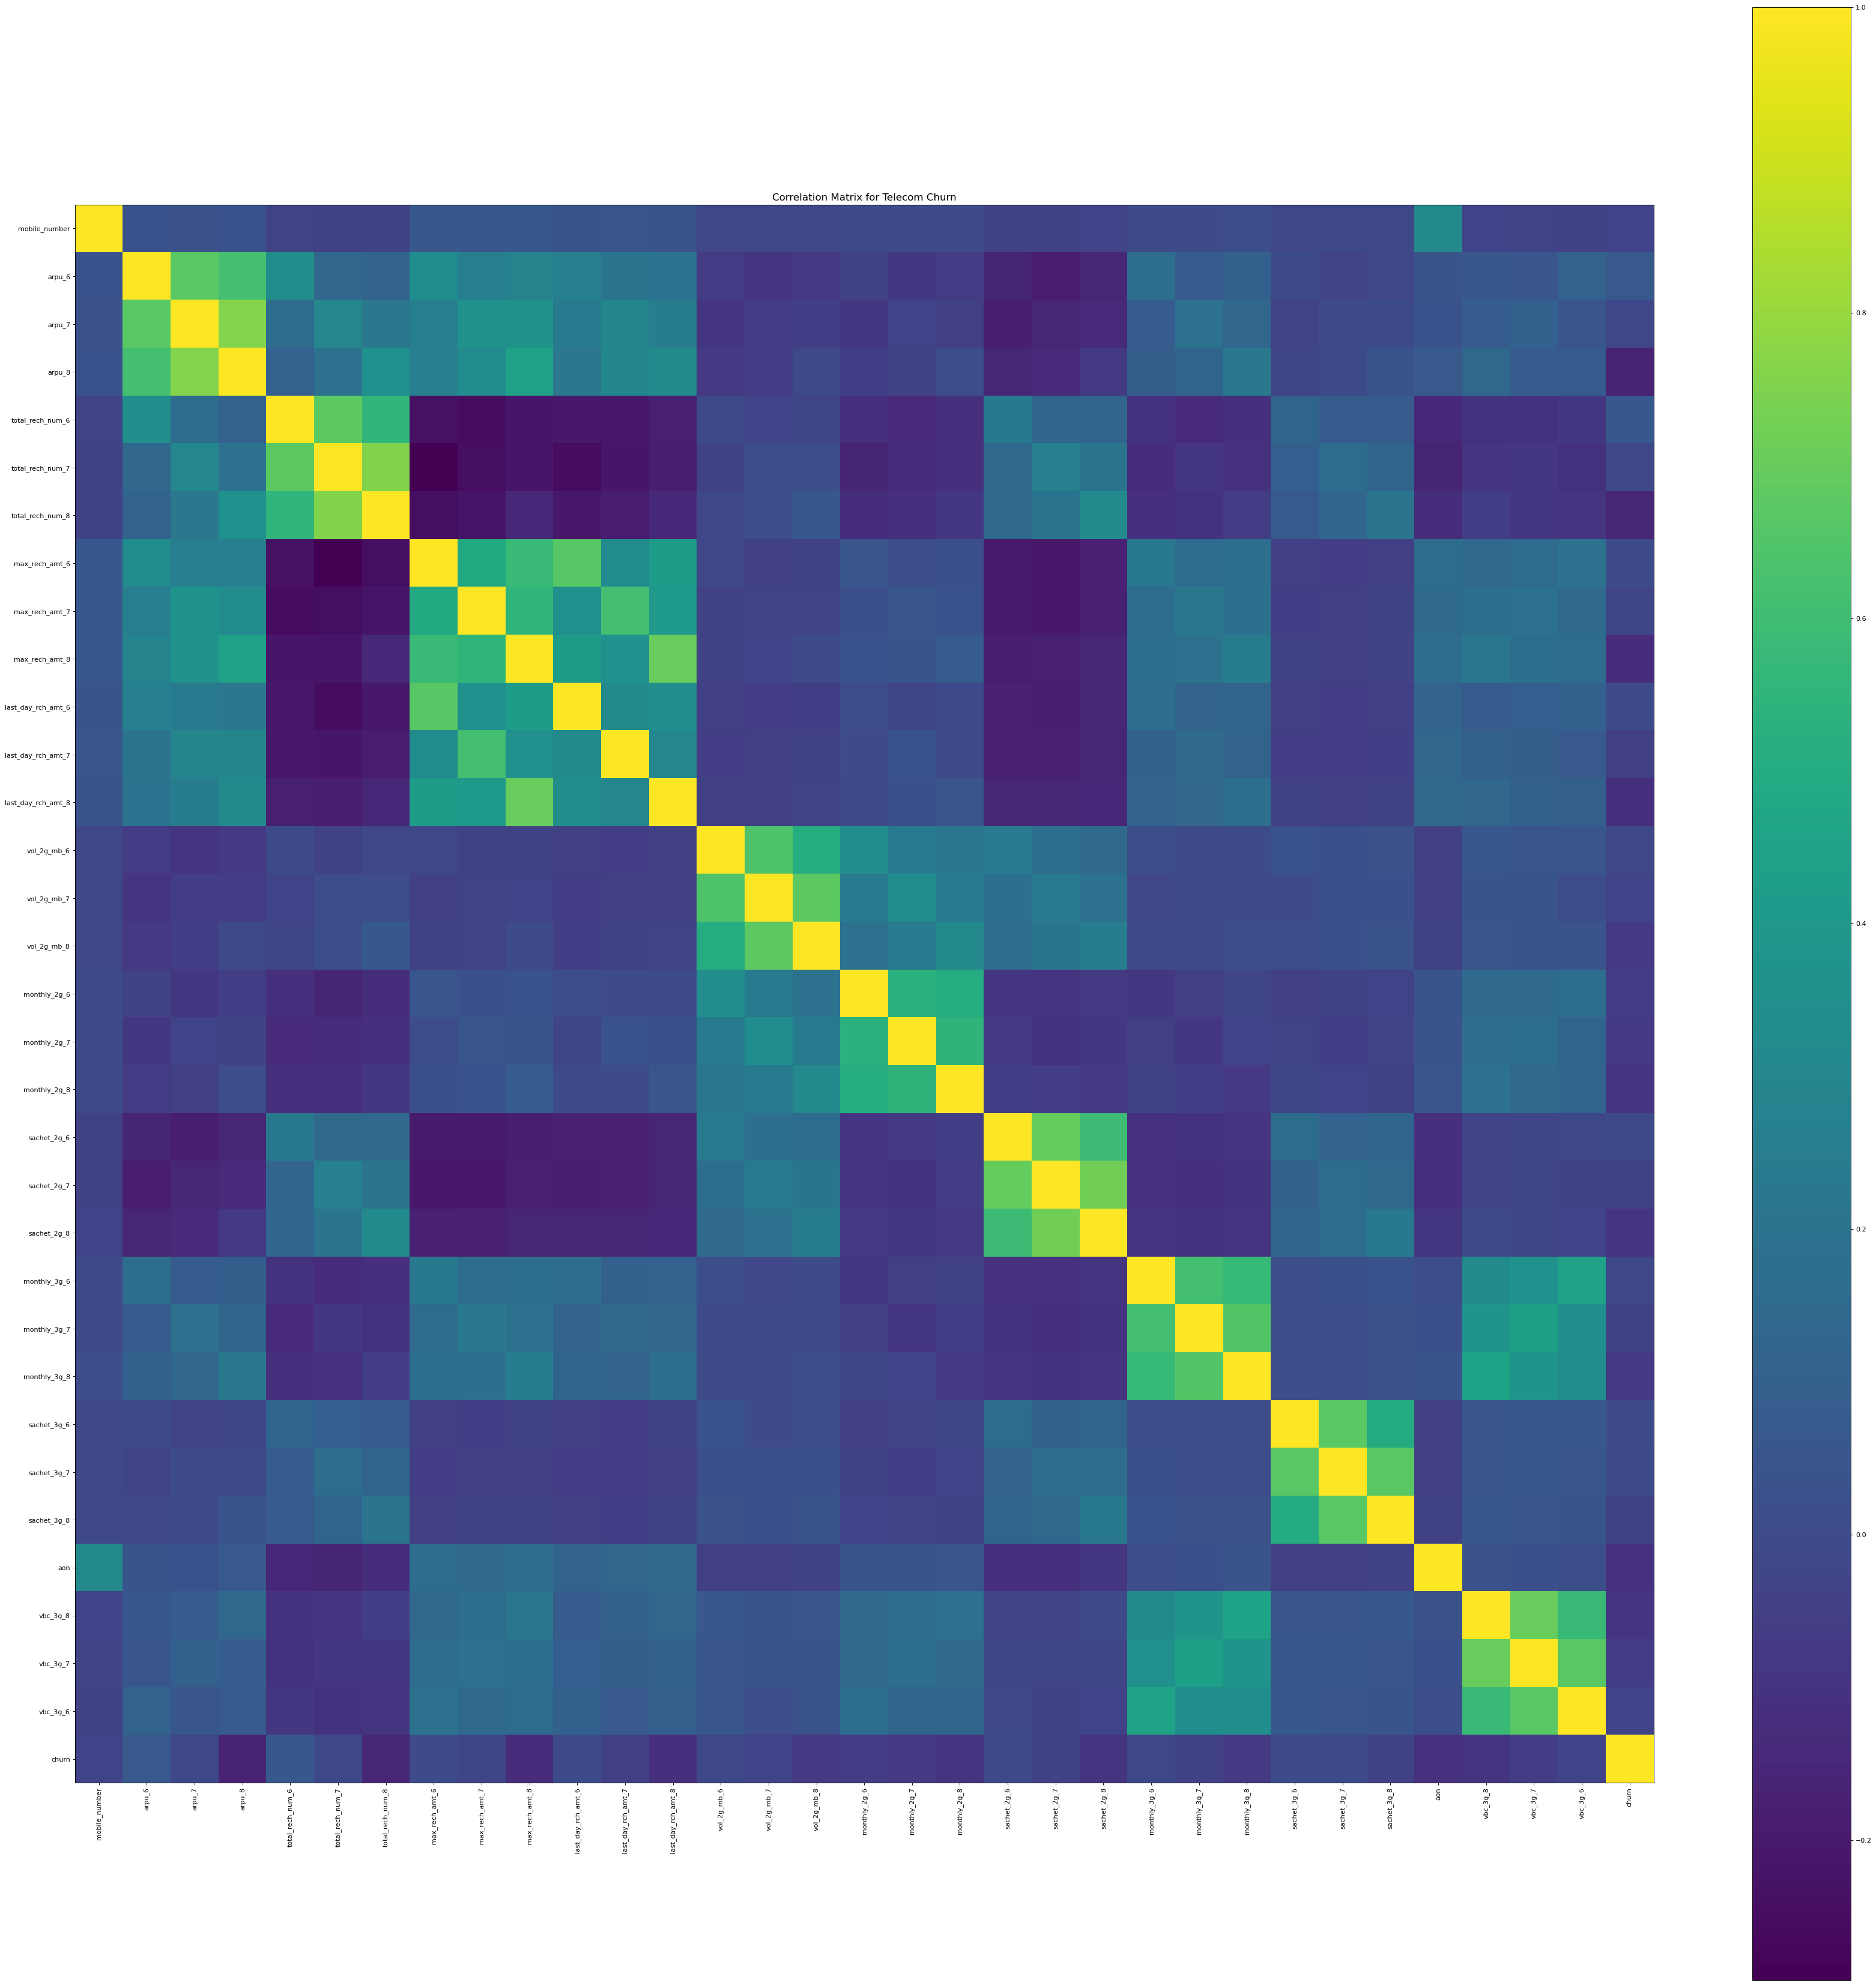

In [35]:
#Heat map plot of high value customer dataset
plotCorrelationMatrix(df_high_val_cust, 53)

In [36]:
#Scatter and density plots:

C:\Users\melwi\AppData\Local\Temp\ipykernel_15300\102845399.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')
C:\Users\melwi\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:122: RuntimeWarning: invalid value encountered in cast
  if np.all(locs == locs.astype(int)):


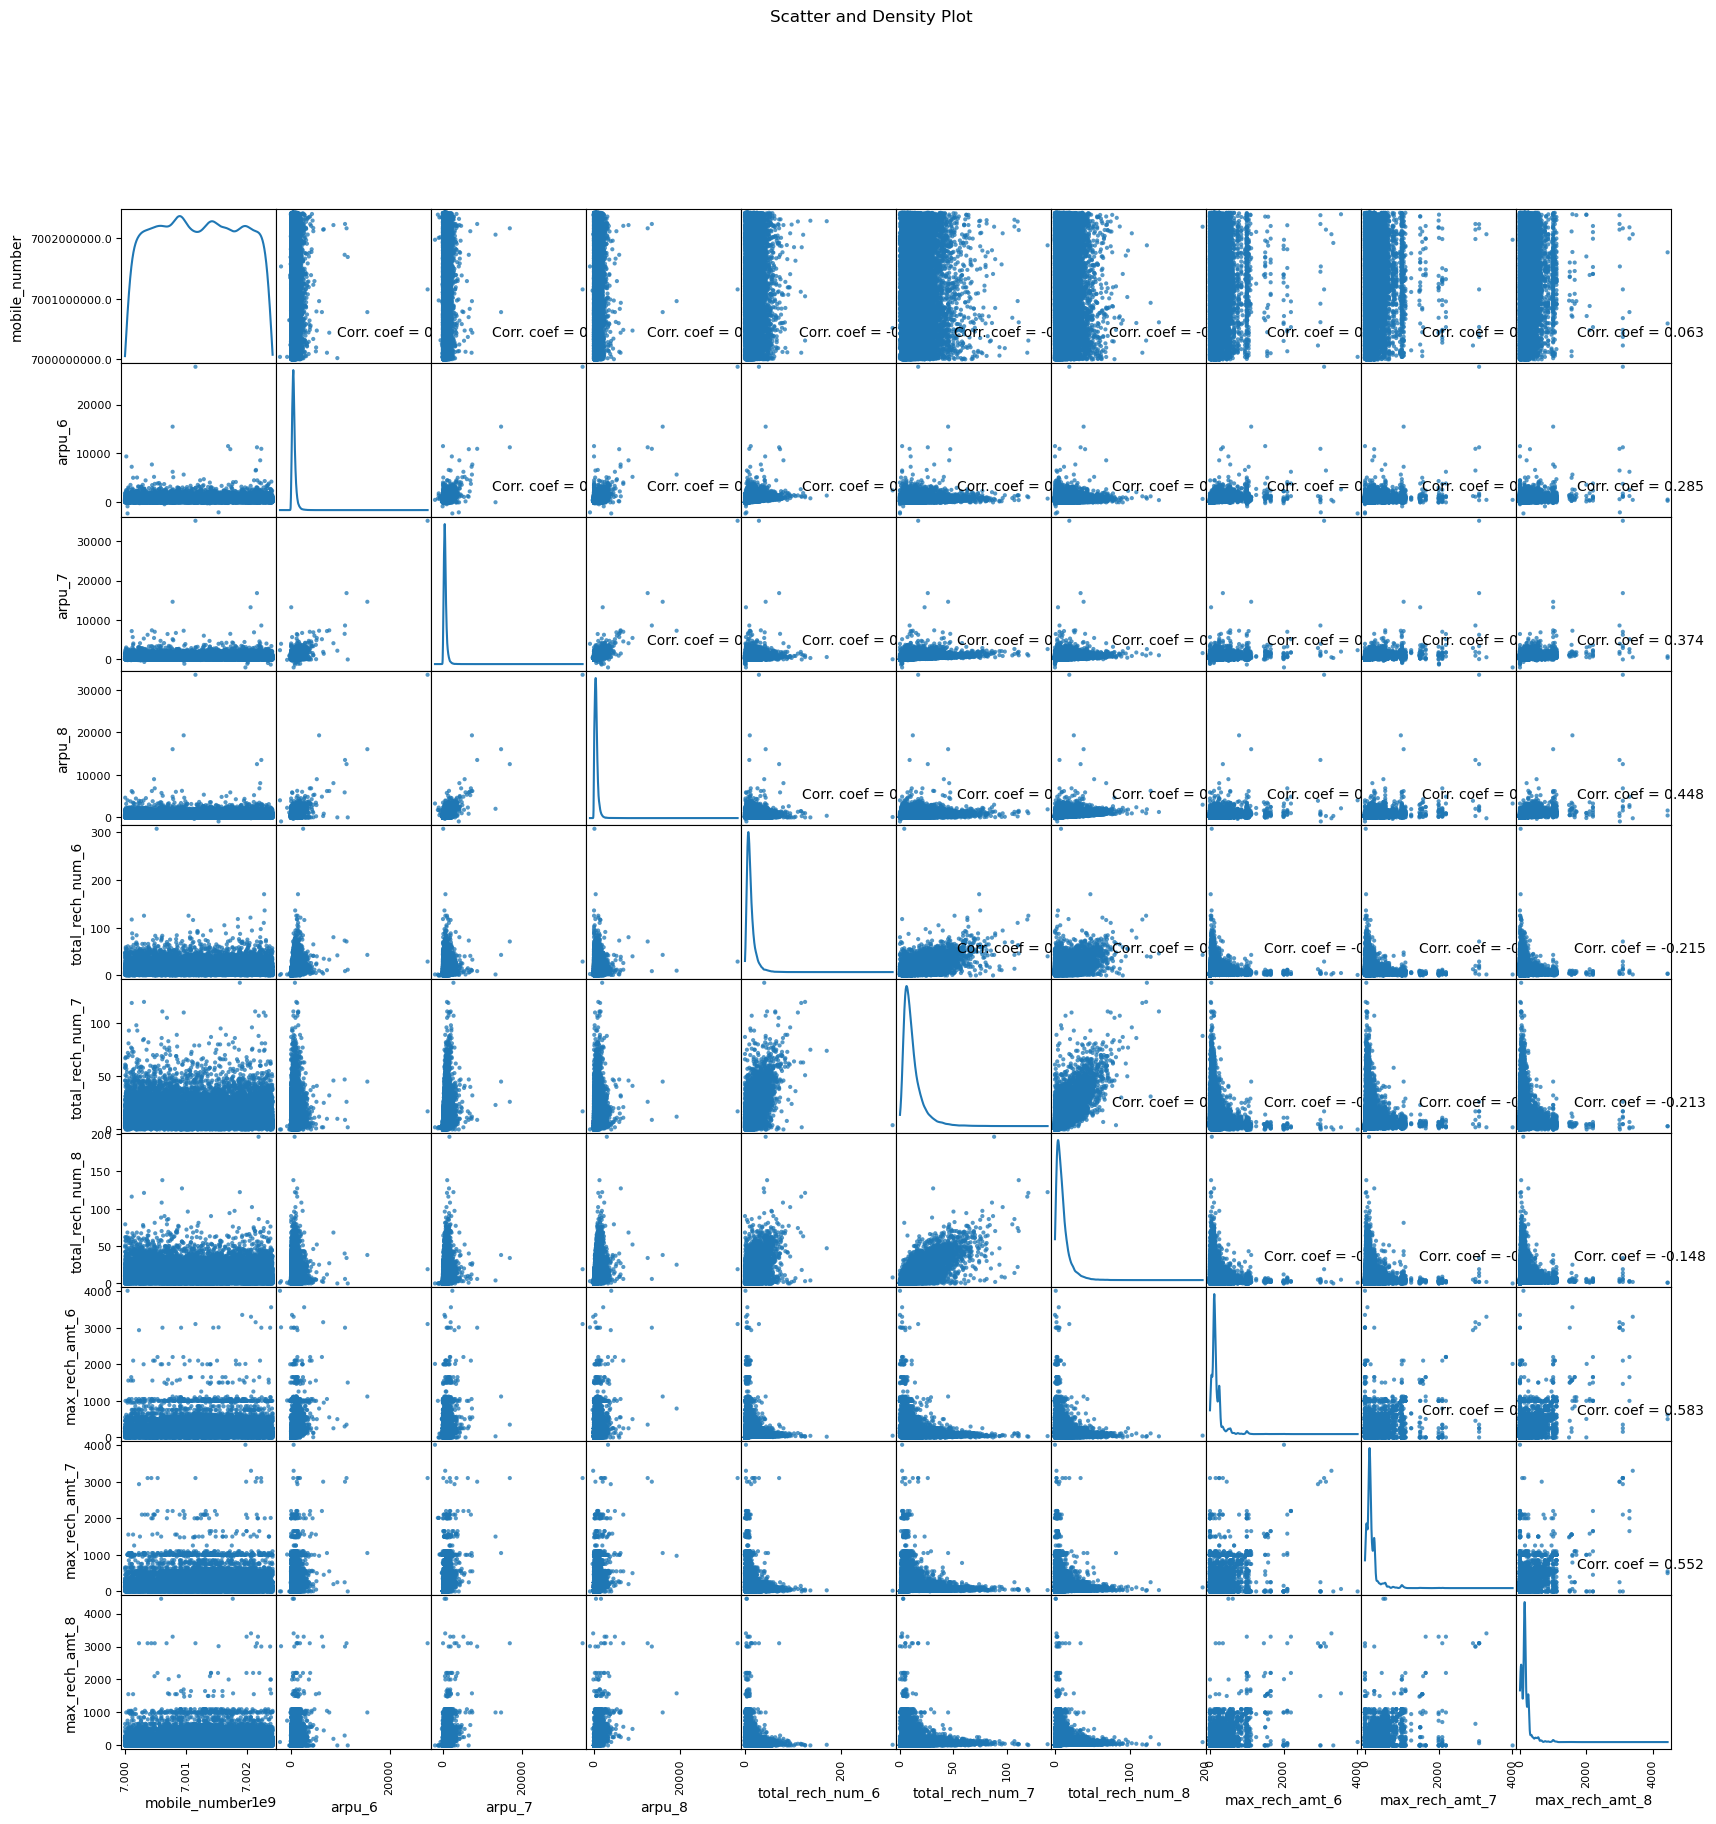

In [37]:
#Pair plot matrix of high value customer dataset
plotScatterMatrix(df_high_val_cust, 20, 10)

In [38]:
#vCreate Columns with Average of 6th & 7th Month Since it's a "Good" Phase and Keep the 8th month untouched as it's "Action" Phase, for now to see if it can give any additional insight

In [39]:
col_list = df_high_val_cust.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

print (df_high_val_cust.shape)

for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    df_high_val_cust[avg_col_name] = (df_high_val_cust[col_6]  + df_high_val_cust[col_7])/ 2

(30001, 87)
arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2c_mou
loc_og_mou
std_og_t2f_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_mou
std_ic_t2t_mou
std_ic_t2f_mou
std_ic_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
max_rech_amt
last_day_rch_amt
vol_2g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g


In [40]:
#Printing number of columns before and after dropping columns
print (df_high_val_cust.shape)

col_list = df_high_val_cust.filter(regex='_6|_7').columns

df_high_val_cust.drop(col_list, axis=1, inplace=True)
df_high_val_cust.shape

(30001, 115)


(30001, 59)

In [41]:
df_high_val_cust.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67
0,7000842753,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,5.44,0.00,0.00,0.00,0.0,0.00,0.00,2,252,252,5.75,0,0,1,0,968,30.40,1,206.1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,252.0,252.0,15.725,0.0,0.0,1.0,0.0,50.600
7,7000701601,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,802,57.74,1,1209.5150,56.26,510.295,24.86,18.165,0.0,478.035,13.37,68.000,0.090,2.25,0.0,391.555,24.360,43.215,176.810,0.105,8.295,15.465,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,19.060
8,7001524846,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,315,21.03,0,435.4720,382.36,87.645,0.00,0.000,0.0,333.135,0.00,136.870,0.000,0.00,0.0,52.630,0.290,0.000,13.545,0.000,0.000,0.000,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,516.405
21,7002124215,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,720,0.00,0,556.1030,117.26,827.305,0.00,0.000,0.0,95.565,0.00,848.990,0.000,0.00,0.0,106.505,10.020,0.000,62.985,0.000,0.000,0.000,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,0.000
23,7000887461,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,604,40.45,0,134.1235,49.81,87.385,0.00,0.000,0.0,132.795,0.00,4.355,0.005,0.05,0.0,145.520,0.255,0.000,8.915,0.000,14.115,2.675,4.0,89.5,89.5,0.240,0.0,0.0,1.0,0.0,25.930


In [42]:
#Conevrt aon in months
df_high_val_cust['aon_mon'] = df_high_val_cust['aon']/30
df_high_val_cust.drop('aon', axis=1, inplace=True)
df_high_val_cust['aon_mon'].head()

0     32.266667
7     26.733333
8     10.500000
21    24.000000
23    20.133333
Name: aon_mon, dtype: float64

Text(0.5, 1.0, 'Churn Distribution')

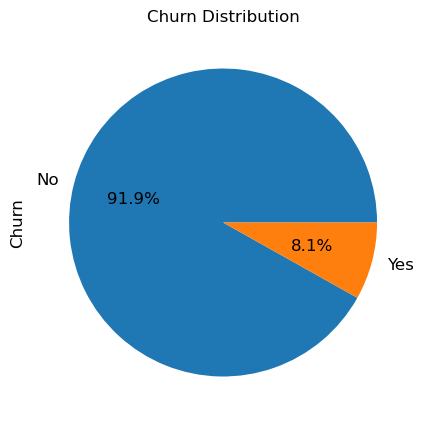

In [43]:
#Churn Distribution
ax = (df_high_val_cust['churn'].value_counts()*100.0 /len(df_high_val_cust)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)

In [44]:
# In our data, 91% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

In [45]:
# Distribution graphs (histogram/bar graph) of sampled columns:

In [47]:
# Checking Correlation Matrix

C:\Users\melwi\AppData\Local\Temp\ipykernel_15300\3661242002.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


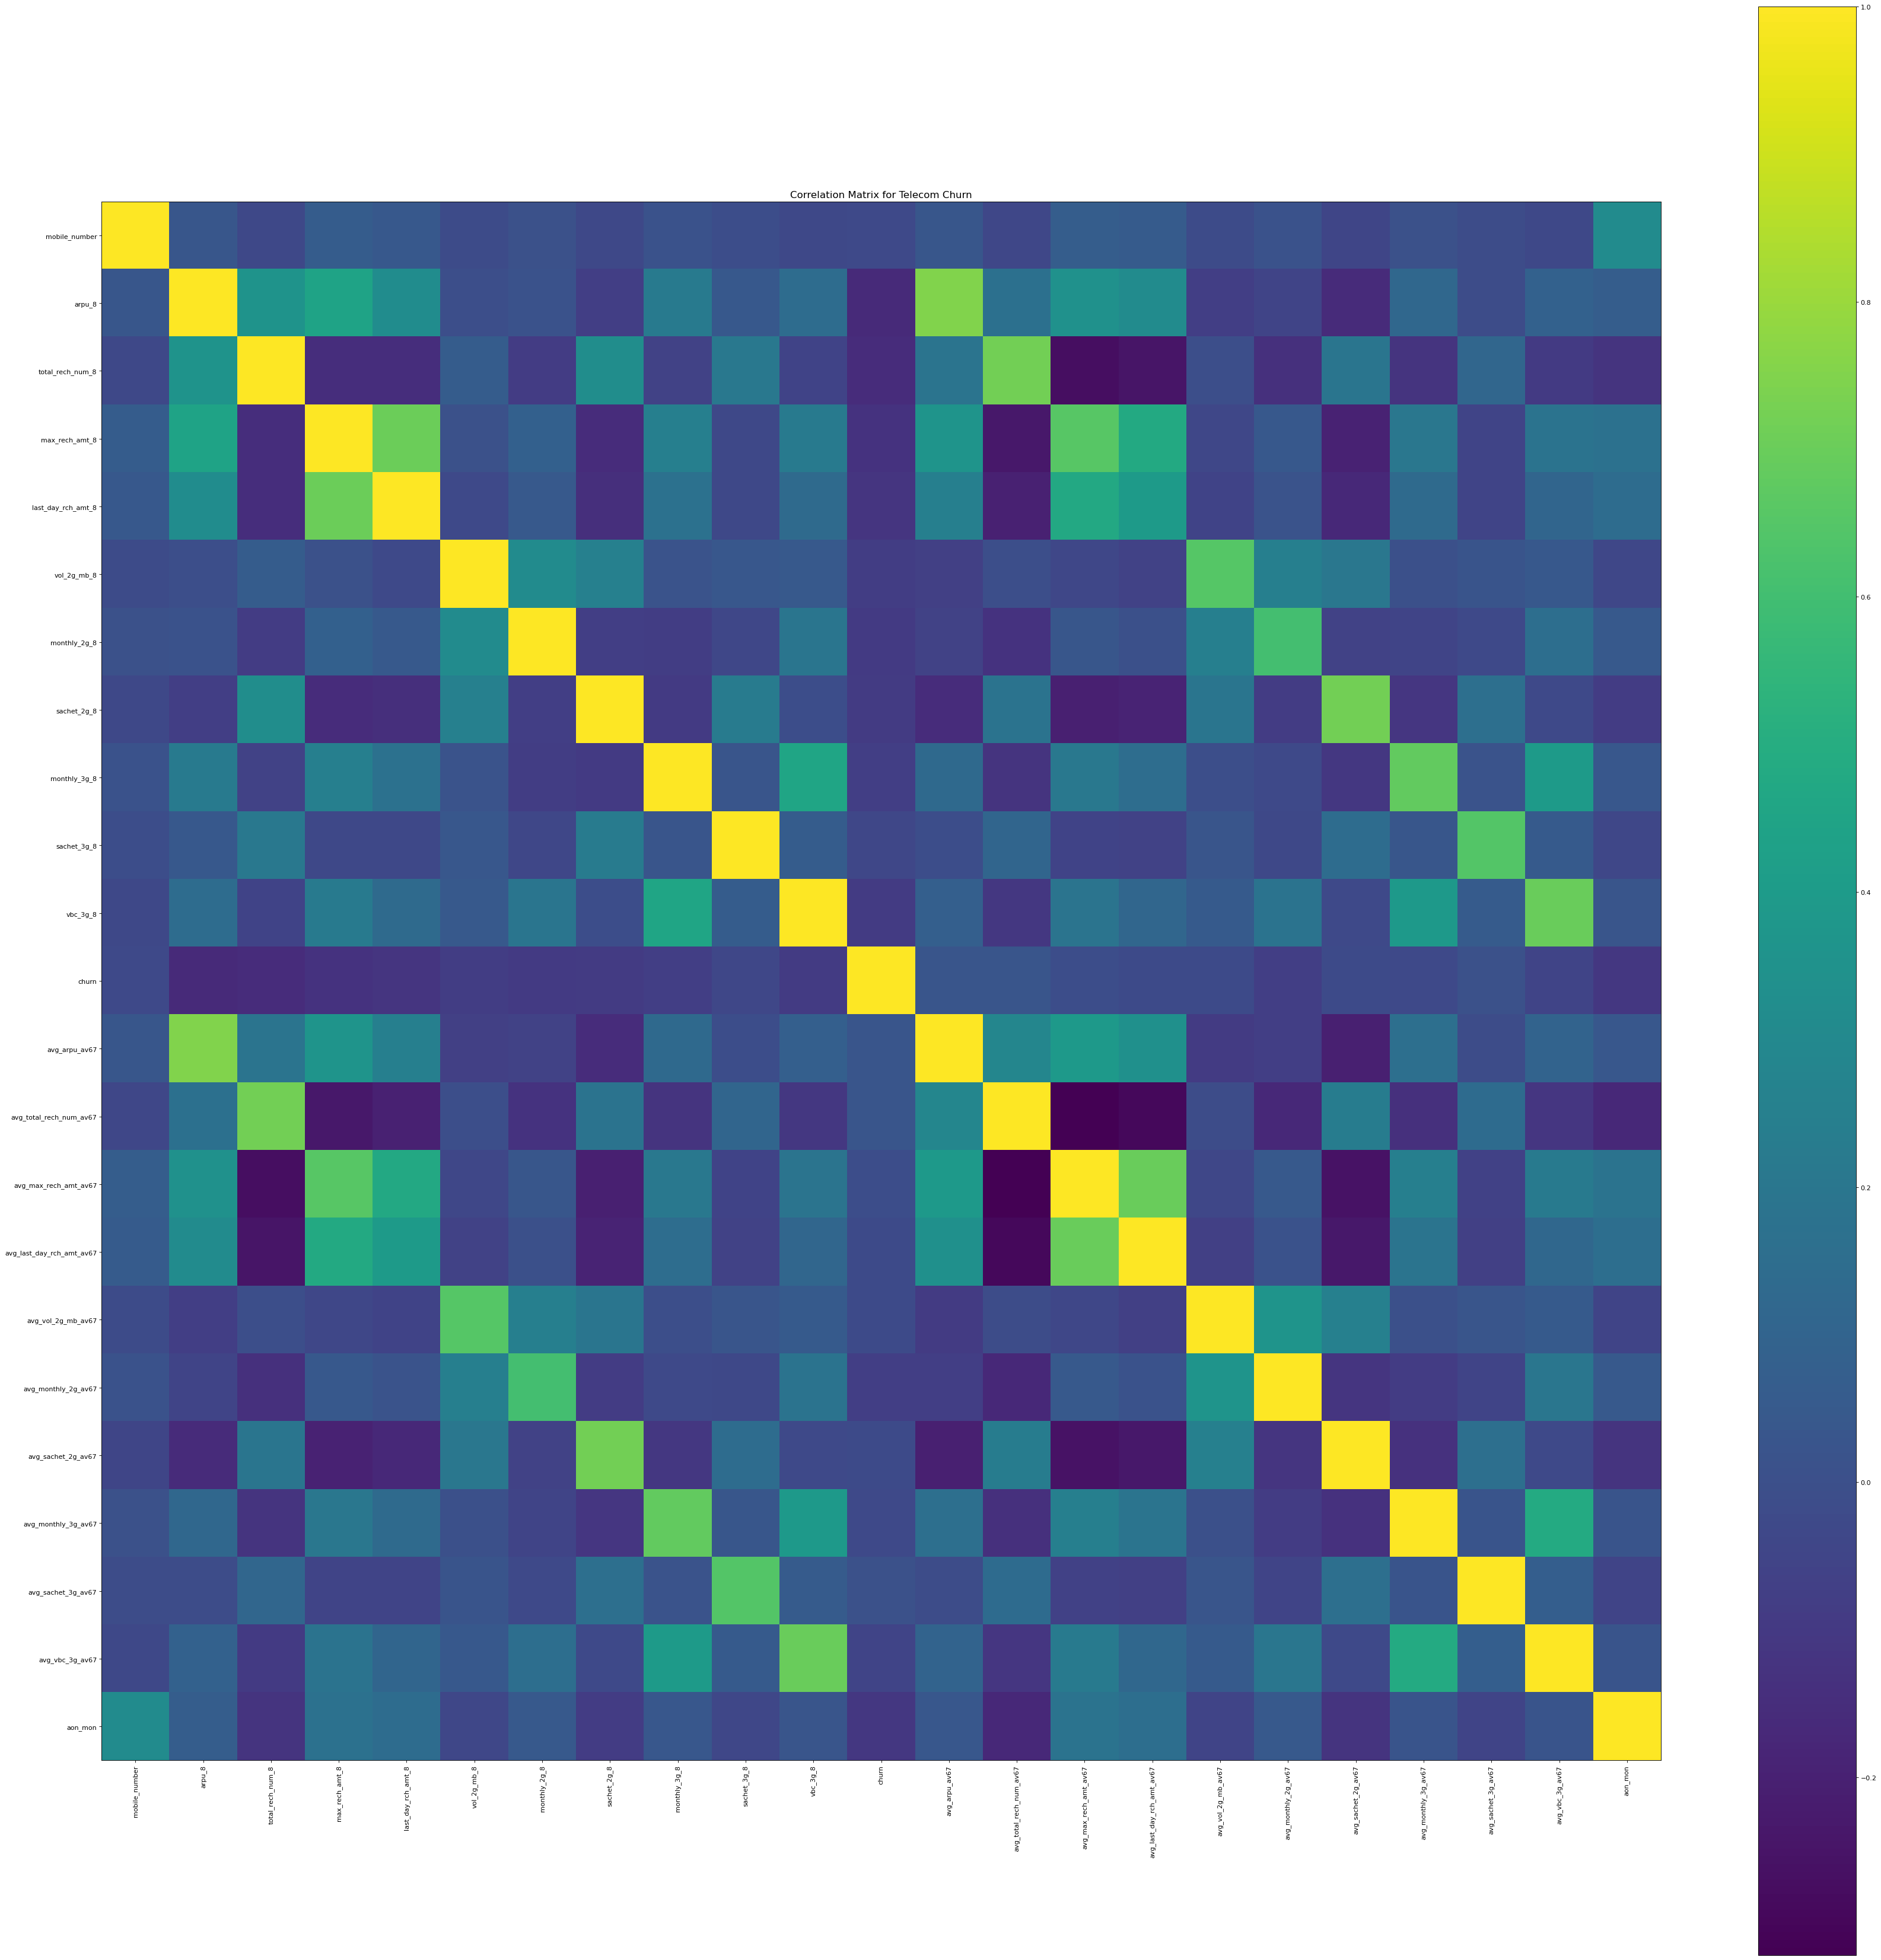

In [48]:
plotCorrelationMatrix(df_high_val_cust, 53)

In [49]:
# Scatter and Density Plot

C:\Users\melwi\AppData\Local\Temp\ipykernel_15300\102845399.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')
C:\Users\melwi\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:122: RuntimeWarning: invalid value encountered in cast
  if np.all(locs == locs.astype(int)):


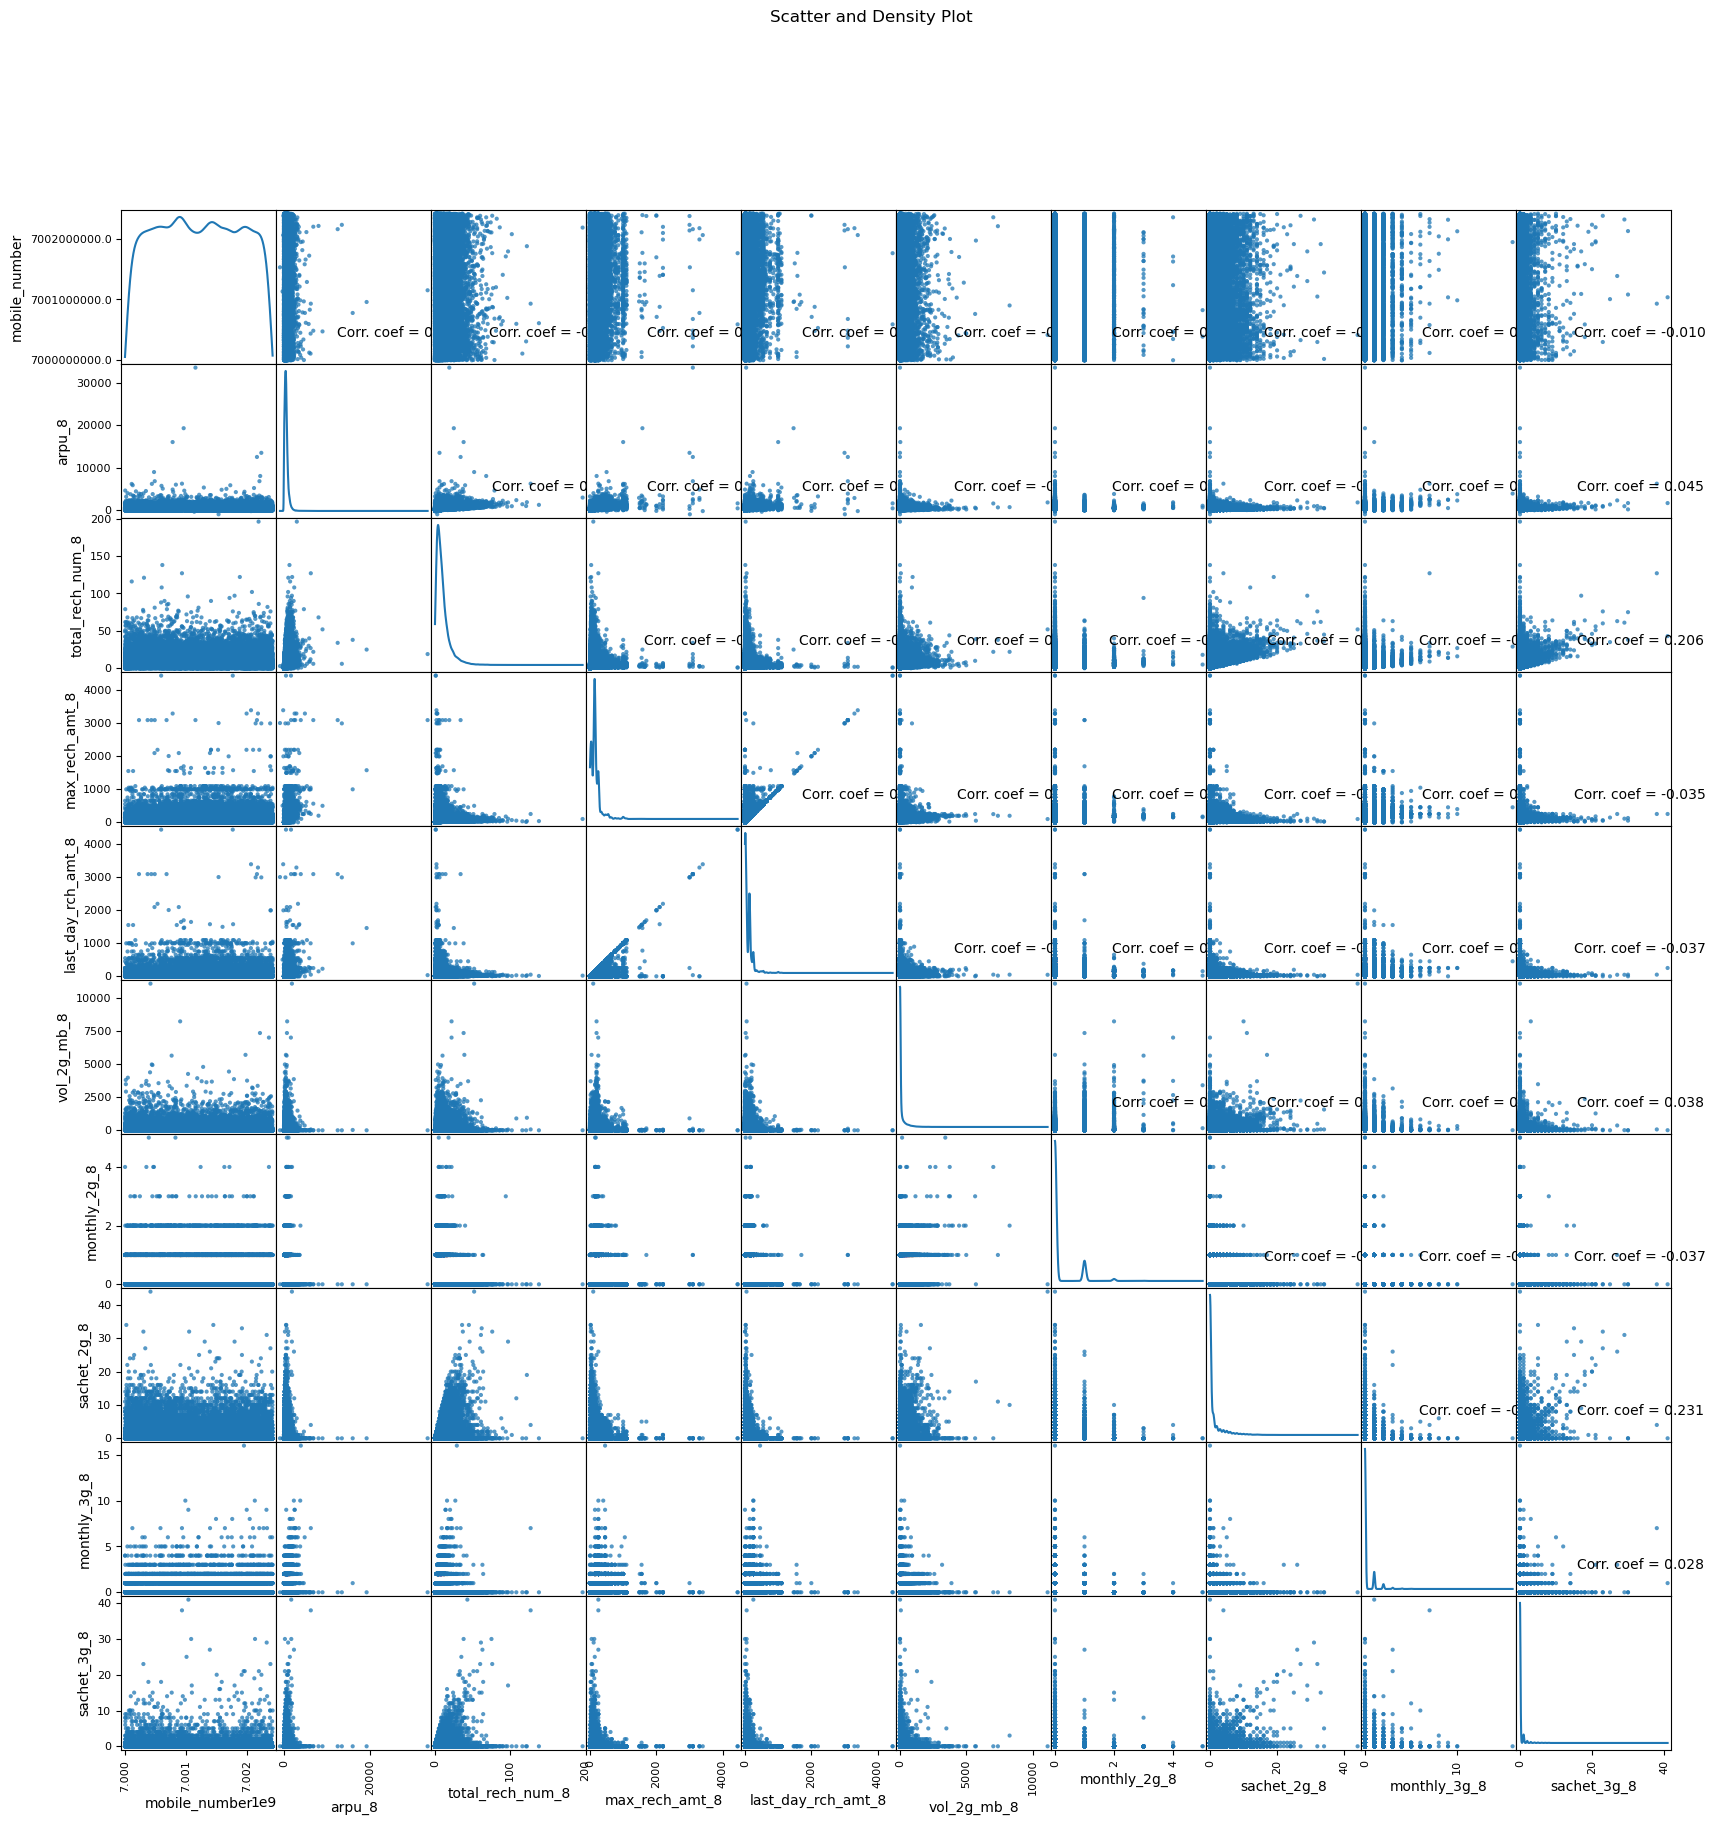

In [50]:
plotScatterMatrix(df_high_val_cust, 20, 10)

C:\Users\melwi\AppData\Local\Temp\ipykernel_15300\1131014830.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_high_val_cust['aon_mon'], hist=True, kde=False,


Text(0.5, 1.0, 'Customers by their tenure')

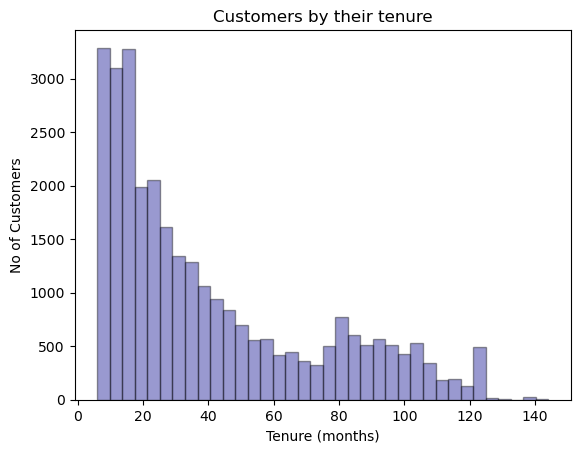

In [51]:
ax = sns.distplot(df_high_val_cust['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Customers by their tenure')

In [52]:
# Binning of months 
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
df_high_val_cust['tenure_range'] = pd.cut(df_high_val_cust['aon_mon'], tn_range, labels=tn_label)
df_high_val_cust['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

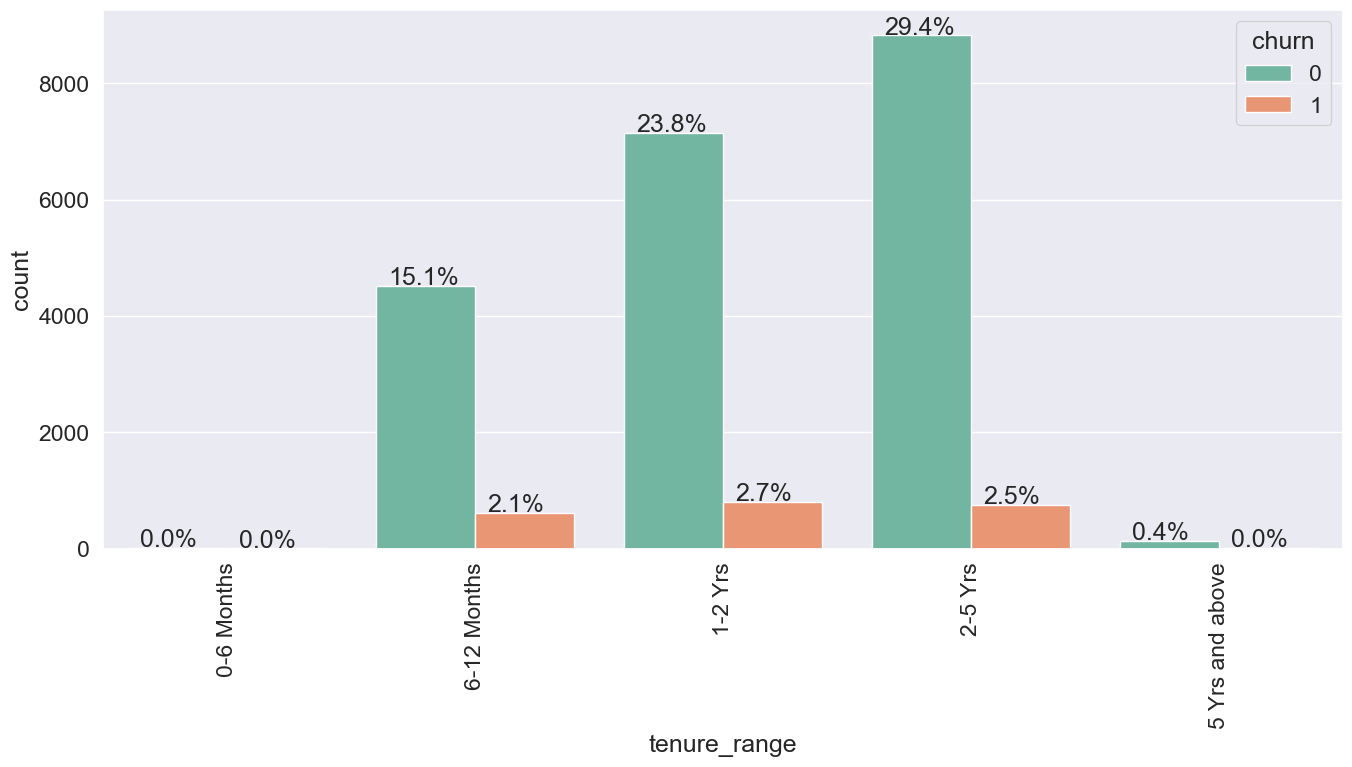

In [53]:
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

temp = pd.Series(data = 'tenure_range')
fig, ax = plt.subplots()
width = len(df_high_val_cust['tenure_range'].unique()) + 6 + 4*len(temp.unique())
fig.set_size_inches(width , 7)

total = float(len(df_high_val_cust.index))
ax = sns.countplot(x="tenure_range", data=df_high_val_cust, palette="Set2", hue = "churn");
for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df_high_val_cust))), (p.get_x()+0.05, p.get_height()+20))
plt.xticks(rotation=90)
plt.show()

In [54]:
# Correlation of "Churn" with other variables:

C:\Users\melwi\AppData\Local\Temp\ipykernel_15300\1990989713.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_high_val_cust.corr()['churn'].sort_values(ascending = False).plot(kind='bar')


<Axes: >

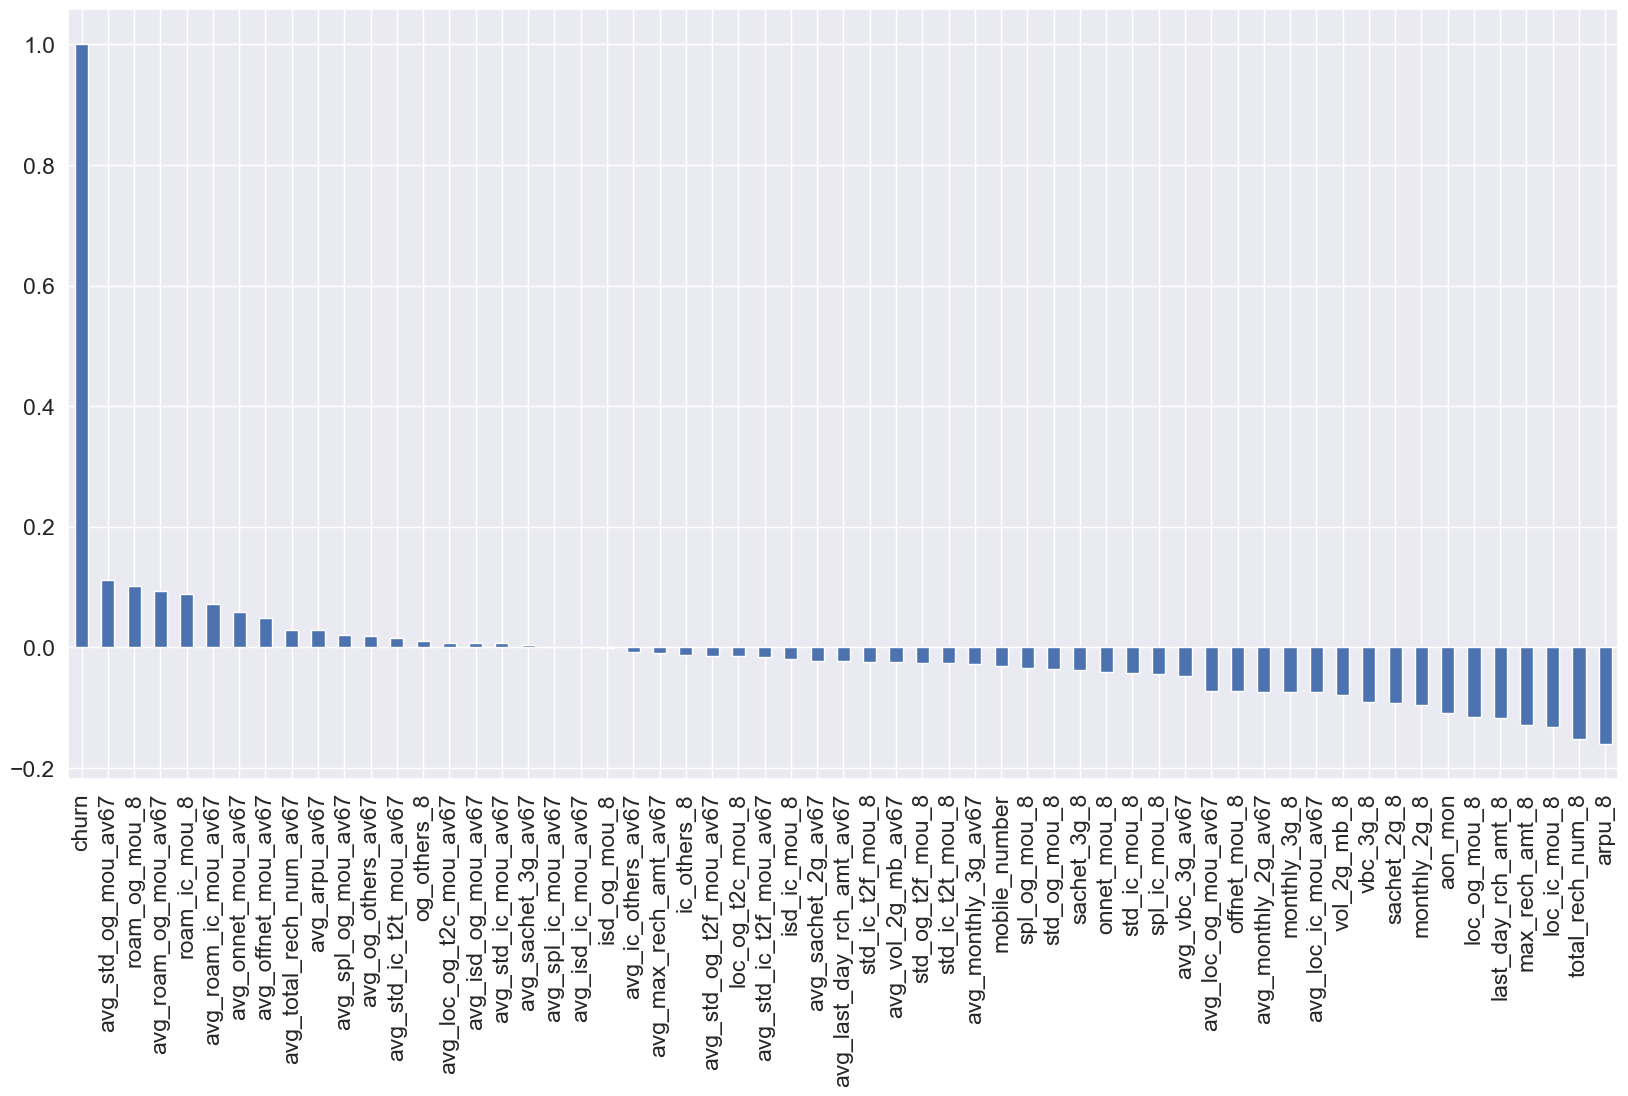

In [55]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(20,10))
df_high_val_cust.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

In [56]:
# Avg STD Outgoing Calls for Month 6 & 7, Outgoing calls in Roaming seems to be positively correlated with Churn while Avg Revenue, No Of Recharge for 8th Month seems negatively correlated.

In [57]:
# Lets look at the relation between total recharge in 8th Month Vs Average Revenue in 8th Month

<Axes: xlabel='total_rech_num_8', ylabel='arpu_8'>

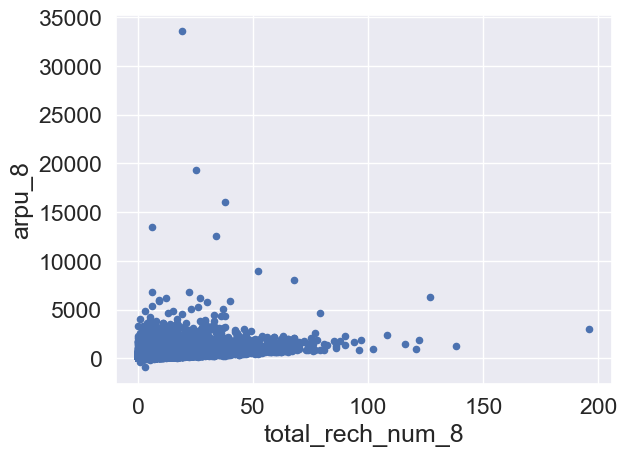

In [58]:
#Scatter plot
df_high_val_cust[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')

In [59]:
# Lets look at the relation between Tenure And Revenue

<Axes: xlabel='aon_mon', ylabel='avg_arpu_av67'>

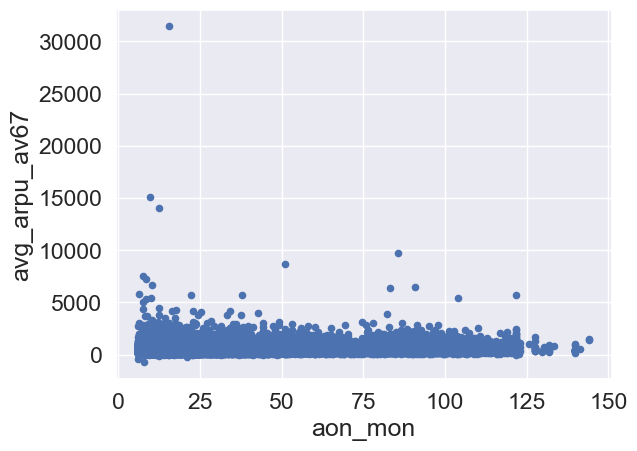

In [60]:
df_high_val_cust[['aon_mon', 'avg_arpu_av67']].plot.scatter(x = 'aon_mon',
                                                              y='avg_arpu_av67')

In [61]:
# Finally, let's take a look at out predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot

In [62]:
# Churn vs Tenure

<Axes: xlabel='churn', ylabel='aon_mon'>

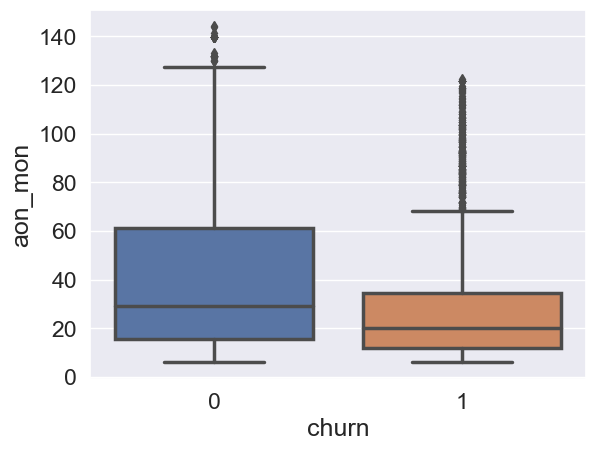

In [63]:
sns.boxplot(x = df_high_val_cust.churn, y = df_high_val_cust.aon_mon)

In [64]:
# As we can see form the below plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.



In [65]:
# Churn Vs Volume based cost

C:\Users\melwi\AppData\Local\Temp\ipykernel_15300\3251756912.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_high_val_cust.avg_max_rech_amt_av67[(df_high_val_cust["churn"] == 0)],
C:\Users\melwi\AppData\Local\Temp\ipykernel_15300\3251756912.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_high_val_cust.avg_max_rech_amt_av67[(df_high_val_cust["churn"] == 1)],


Text(0.5, 1.0, 'Distribution of Volume based cost by churn')

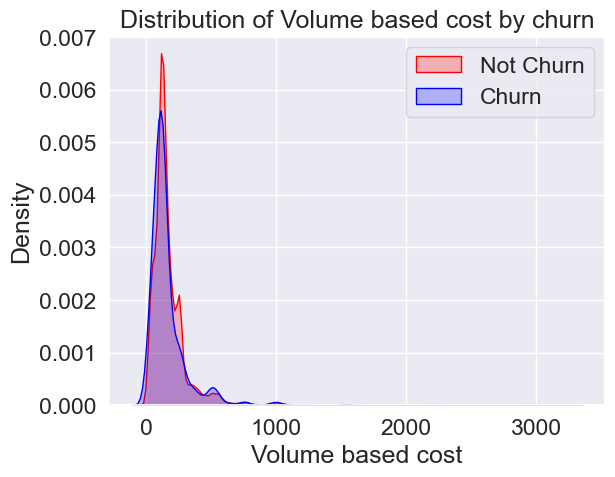

In [66]:
ax = sns.kdeplot(df_high_val_cust.avg_max_rech_amt_av67[(df_high_val_cust["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df_high_val_cust.avg_max_rech_amt_av67[(df_high_val_cust["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Volume based cost by churn')

In [67]:
# Churn Vs Max Recharge Amount

C:\Users\melwi\AppData\Local\Temp\ipykernel_15300\2701776031.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_high_val_cust.max_rech_amt_8[(df_high_val_cust["churn"] == 0)],
C:\Users\melwi\AppData\Local\Temp\ipykernel_15300\2701776031.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_high_val_cust.max_rech_amt_8[(df_high_val_cust["churn"] == 1)],


Text(0.5, 1.0, 'Distribution of Max Recharge Amount by churn')

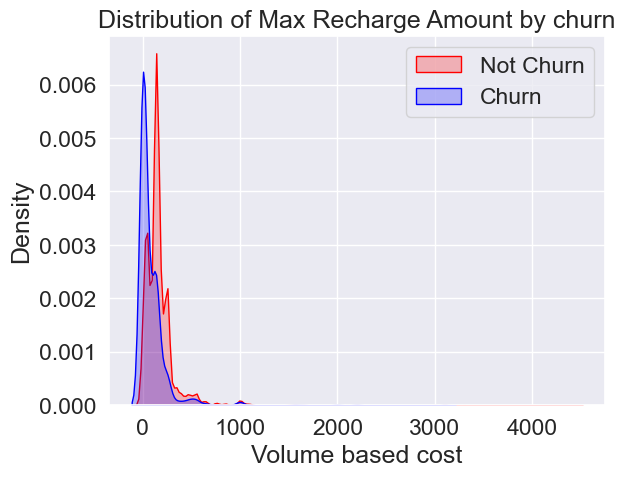

In [68]:
ax = sns.kdeplot(df_high_val_cust.max_rech_amt_8[(df_high_val_cust["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df_high_val_cust.max_rech_amt_8[(df_high_val_cust["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')

In [69]:
#People Who Recharge with less Amount are more likely to Churn
#There is no visible difference in Volume Based Cost & Churn

In [70]:
df_high_val_cust.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,aon_mon,tenure_range
0,7000842753,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,5.44,0.00,0.00,0.00,0.0,0.00,0.00,2,252,252,5.75,0,0,1,0,30.40,1,206.1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,252.0,252.0,15.725,0.0,0.0,1.0,0.0,50.600,32.266667,2-5 Yrs
7,7000701601,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,57.74,1,1209.5150,56.26,510.295,24.86,18.165,0.0,478.035,13.37,68.000,0.090,2.25,0.0,391.555,24.360,43.215,176.810,0.105,8.295,15.465,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,19.060,26.733333,2-5 Yrs
8,7001524846,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,21.03,0,435.4720,382.36,87.645,0.00,0.000,0.0,333.135,0.00,136.870,0.000,0.00,0.0,52.630,0.290,0.000,13.545,0.000,0.000,0.000,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,516.405,10.500000,6-12 Months
21,7002124215,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,0.00,0,556.1030,117.26,827.305,0.00,0.000,0.0,95.565,0.00,848.990,0.000,0.00,0.0,106.505,10.020,0.000,62.985,0.000,0.000,0.000,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,0.000,24.000000,1-2 Yrs
23,7000887461,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,40.45,0,134.1235,49.81,87.385,0.00,0.000,0.0,132.795,0.00,4.355,0.005,0.05,0.0,145.520,0.255,0.000,8.915,0.000,14.115,2.675,4.0,89.5,89.5,0.240,0.0,0.0,1.0,0.0,25.930,20.133333,1-2 Yrs


In [71]:
#Lets Create New DF for Model Building

new_df = df_high_val_cust[:].copy()

#Dropping tenure_range since we have AON MONTH already and columns are highly coorelated
new_df.drop('tenure_range', axis=1, inplace=True)
new_df.drop('mobile_number', axis=1, inplace=True)

#Since All The Values are realted to Price/ Cost/ Amount, Filling NaN with 0

new_df.fillna(0, inplace=True)

new_df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,aon_mon
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,5.44,0.00,0.00,0.00,0.0,0.00,0.00,2,252,252,5.75,0,0,1,0,30.40,1,206.1005,0.00,0.000,0.00,0.000,0.0,0.000,0.00,0.000,0.000,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.5,252.0,252.0,15.725,0.0,0.0,1.0,0.0,50.600,32.266667
7,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,57.74,1,1209.5150,56.26,510.295,24.86,18.165,0.0,478.035,13.37,68.000,0.090,2.25,0.0,391.555,24.360,43.215,176.810,0.105,8.295,15.465,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,19.060,26.733333
8,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,21.03,0,435.4720,382.36,87.645,0.00,0.000,0.0,333.135,0.00,136.870,0.000,0.00,0.0,52.630,0.290,0.000,13.545,0.000,0.000,0.000,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,516.405,10.500000
21,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,0.00,0,556.1030,117.26,827.305,0.00,0.000,0.0,95.565,0.00,848.990,0.000,0.00,0.0,106.505,10.020,0.000,62.985,0.000,0.000,0.000,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,0.000,24.000000
23,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,40.45,0,134.1235,49.81,87.385,0.00,0.000,0.0,132.795,0.00,4.355,0.005,0.05,0.0,145.520,0.255,0.000,8.915,0.000,14.115,2.675,4.0,89.5,89.5,0.240,0.0,0.0,1.0,0.0,25.930,20.133333


In [72]:
X = new_df.drop(['churn'], axis=1)
y = new_df['churn']

new_df.drop('churn', axis=1, inplace=True)

In [73]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [74]:
# Split in train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [75]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data : ", y_train_imb)
print("Imbalance in Test Data : ", y_test_imb)

X_train Shape :  (21000, 57)
X_test Shape :  (9001, 57)
Imbalance in Train Data :  0.08875985068436333
Imbalance in Test Data :  0.08812862669245648


In [76]:
# Balancing DataSet

sm = SMOTE()
X_tr,y_tr = sm.fit_resample(X_train,y_train)

In [77]:
print("y_tr Shape", y_tr.shape)

imb = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data : ",imb)

y_tr Shape (38576,)
Imbalance in Train Data :  1.0


In [78]:
# Model Building

In [79]:
# Support Vecor Machine (SVM)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

lr = LogisticRegression()

lr.svm = SVC(kernel='linear') 
lr.svm.fit(X_train,y_train)
preds = lr.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.9170138310281619

In [89]:
# LR S# ummary

#Model Accuracy is 79%
# Confusion matix clearly shows that the model has drawback in predicting churn as high false positives.

In [90]:
PCA

sklearn.decomposition._pca.PCA

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

#Applying Smote
sm = SMOTE()
X_tr,y_tr = sm.fit_resample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(38576, 57)
(38576,)


In [92]:
# Applying PCA

In [93]:
#Improting the PCA module
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_tr)

PCA(random_state=100)

In [94]:
X_tr_pca = pca.fit_transform(X_tr)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(38576, 57)
(9001, 57)


In [97]:
#Applying logistic regression

In [98]:
# Instance of logistic regression
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(X_tr_pca, y_tr)

# Predicted probabilities
y_pred = lr_pca.predict(X_test_pca)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [99]:
# Printing confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

[[6751 1521]
 [ 130  599]]


In [100]:
# check sensitivity and specificity

# Substituting the value of true positive
TP = conf_mat[1,1]
# Substituting the value of true negatives
TN = conf_mat[0,0]
# Substituting the value of false positives
FP = conf_mat[0,1] 
# Substituting the value of false negatives
FN = conf_mat[1,0]

# Calculating the sensitivity
sens_log_pca=TP/(TP+FN)

# Calculating the specificity
spec_log_pca=TN/(TN+FP)

print("Sensitivity:" ,sens_log_pca)
print("Specificity:" ,spec_log_pca)

Sensitivity: 0.821673525377229
Specificity: 0.8161266924564797


In [101]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred))

Logistic Regression accuracy with PCA:  0.8165759360071103


In [102]:
col = list(new_df.columns)
df_pca = pd.DataFrame({'PCA1':pca.components_[0],'PCA2':pca.components_[1], 'PCA3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PCA1,PCA2,PCA3,Feature
0,0.266299,-0.097939,0.165251,arpu_8
1,0.165751,-0.185258,-0.026113,onnet_mou_8
2,0.222242,-0.161156,0.052362,offnet_mou_8
3,0.302124,0.338948,-0.172183,roam_ic_mou_8
4,0.270928,0.225372,-0.157429,roam_og_mou_8
5,0.037092,-0.055579,-0.004686,loc_og_t2c_mou_8
6,0.126601,-0.107161,0.188055,loc_og_mou_8
7,0.034938,-0.000332,0.076091,std_og_t2f_mou_8
8,0.175866,-0.238796,-0.066377,std_og_mou_8
9,0.029730,-0.007167,0.044059,isd_og_mou_8


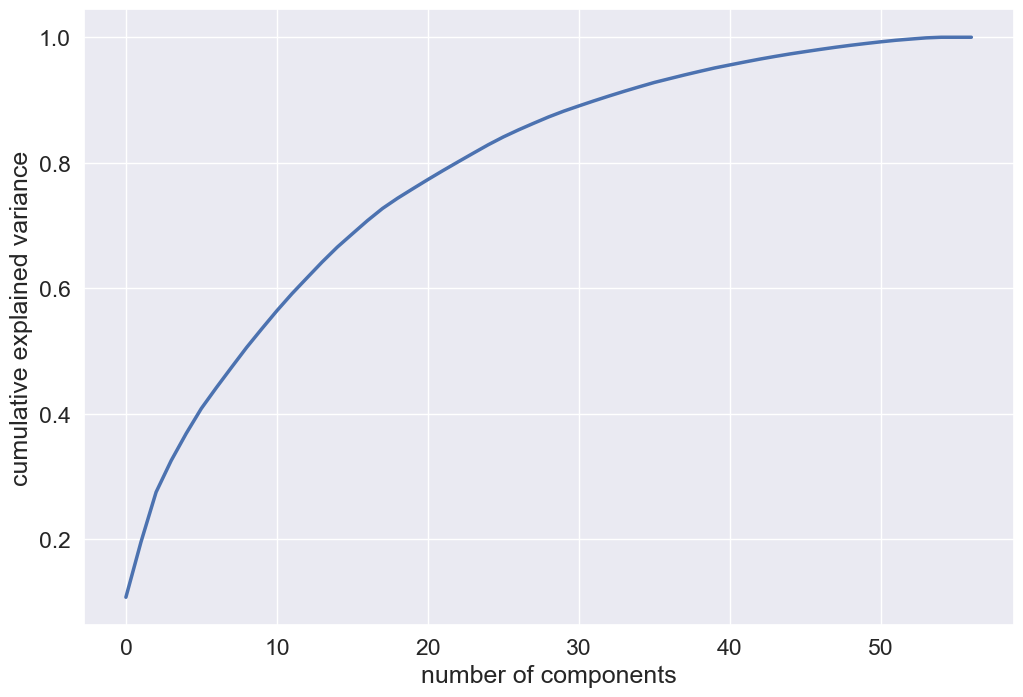

In [103]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [104]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 10.8 ,  19.61,  27.54,  32.57,  36.91,  40.88,  44.21,  47.43,
        50.6 ,  53.55,  56.43,  59.15,  61.68,  64.19,  66.56,  68.68,
        70.79,  72.73,  74.36,  75.85,  77.32,  78.75,  80.14,  81.51,
        82.86,  84.1 ,  85.22,  86.27,  87.29,  88.21,  89.04,  89.85,
        90.62,  91.37,  92.09,  92.78,  93.38,  93.98,  94.55,  95.1 ,
        95.58,  96.05,  96.51,  96.93,  97.33,  97.7 ,  98.05,  98.39,
        98.7 ,  98.99,  99.26,  99.51,  99.71,  99.9 , 100.  , 100.  ,
       100.  ])

In [105]:
# Applying LR with 32 columns with 90% variance

In [106]:
pca_32 = PCA(n_components=32)

df_tr_pca_32 = pca_32.fit_transform(X_tr)
print(df_tr_pca_32.shape)

df_test_pca_32 = pca_32.transform(X_test)
print(df_test_pca_32.shape)

(38576, 32)
(9001, 32)


In [107]:
# Let's run the model using the selected variables
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_tr_pca_32, y_tr)

# Predicted probabilities
y_pred32 = lr_pca1.predict(df_test_pca_32)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred32)

In [108]:
conf_matrices = confusion_matrix(y_test,y_pred32)

In [109]:
# check sensitivity and specificity

# Substituting the value of true positive
TP = conf_matrices[1,1]
# Substituting the value of true negatives
TN = conf_matrices[0,0]
# Substituting the value of false positives
FP = conf_matrices[0,1] 
# Substituting the value of false negatives
FN = conf_matrices[1,0]

# Calculating the sensitivity
sens_log_pca=TP/(TP+FN)

# Calculating the specificity
spec_log_pca=TN/(TN+FP)

print("Sensitivity:" ,sens_log_pca)
print("Specificity:" ,spec_log_pca)

Sensitivity: 0.8052126200274349
Specificity: 0.813225338491296


In [110]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred32))

Logistic Regression accuracy with PCA:  0.8125763804021775


In [111]:
# PCA Summary :

# Model has 81% Accuracy
# 32 Features can obtain optimal accuracy with 90% Variance
# Main Features are arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8

In [112]:
# Decision Tress

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

#Applying Smote
sm = SMOTE()
X_tr,y_tr = sm.fit_resample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(38576, 57)
(38576,)


In [114]:
# Feature reduction using LASSO

In [115]:
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_tr)
pos = model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_lasso.shape)
print(pos)

(38576, 29)
[ 0  2  3  4  6  7  8 10 12 15 16 19 21 22 23 24 25 26 27 28 31 33 36 40
 47 48 50 51 56]


In [116]:
#feature vector for decision tree
lasso_features = list(df.columns[pos])
print("Features for LASSO model buidling: ", lasso_features)

Features for LASSO model buidling:  ['mobile_number', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_7', 'arpu_9', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_9']


In [117]:
# Decision Tree with Default Hyperparameter

In [118]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_lasso, y_tr)

DecisionTreeClassifier(max_depth=5)

In [119]:
# The evaluation metrics of our default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred1 = dt1.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8272
           1       0.37      0.78      0.50       729

    accuracy                           0.87      9001
   macro avg       0.67      0.83      0.71      9001
weighted avg       0.93      0.87      0.89      9001



In [120]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred1))
print('Accuracy of Decision Tree :',accuracy_score(y_test,y_pred1))

[[7281  991]
 [ 158  571]]
Accuracy of Decision Tree : 0.872347516942562


In [130]:
#Hyperparameter Tuning

In [131]:
#Tuning max_depth

In [132]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dt = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True,verbose = 1)
tree.fit(X_lasso, y_tr)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy', verbose=1)

In [ ]:
# scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()

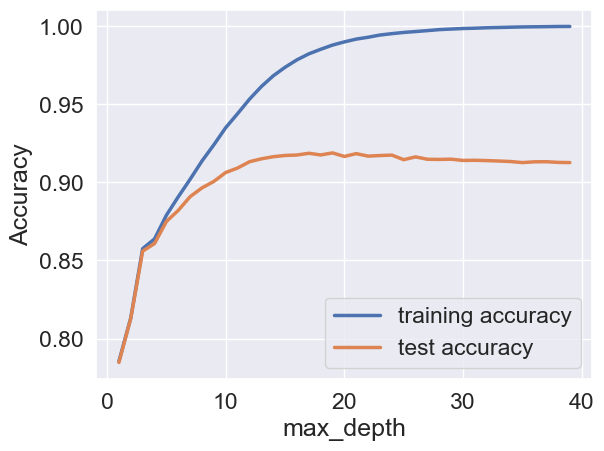

In [134]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [135]:
# According to above plot, max_depth =10 is optimal

In [136]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True,verbose = 1)
tree.fit(X_lasso, y_tr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [137]:
# scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.629580,0.044962,0.007498,0.006805,5,{'min_samples_leaf': 5},0.877657,0.913675,0.920415,0.909786,0.912638,0.906834,0.015000,1,0.968179,0.963838,0.964421,0.964551,0.963741,0.964946,0.001647
1,0.518965,0.018298,0.001321,0.001089,25,{'min_samples_leaf': 25},0.871047,0.907453,0.908360,0.899806,0.899287,0.897191,0.013600,2,0.926539,0.922102,0.921163,0.918894,0.916594,0.921058,0.003339
2,0.434744,0.015294,0.003125,0.006251,45,{'min_samples_leaf': 45},0.872473,0.899028,0.896176,0.891380,0.896306,0.891073,0.009620,3,0.914258,0.907650,0.908234,0.905706,0.904443,0.908058,0.003383
3,0.403670,0.011375,0.000000,0.000000,65,{'min_samples_leaf': 65},0.873510,0.898769,0.889436,0.887362,0.894880,0.888791,0.008633,4,0.908555,0.901364,0.898999,0.899744,0.899031,0.901539,0.003612
4,0.384711,0.015519,0.006250,0.007655,85,{'min_samples_leaf': 85},0.865474,0.888788,0.886325,0.883344,0.891510,0.883088,0.009211,5,0.895399,0.892745,0.892939,0.897022,0.892421,0.894105,0.001802


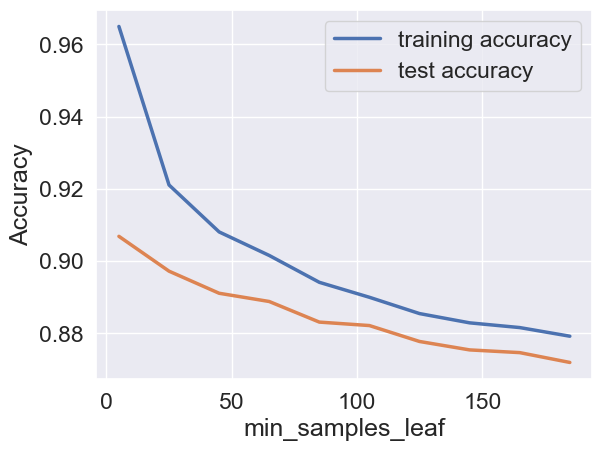

In [138]:
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [139]:
# min_samples_leaf=50 looks optimal

In [140]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_lasso, y_tr)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(25, 175, 50),
                         'min_samples_split': range(50, 150, 50)},
             return_train_score=True, verbose=1)

In [141]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)

Best Accuracy 0.895168457560306


In [142]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=50)


In [143]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini.fit(X_lasso, y_tr)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=25, min_samples_split=50,
                       random_state=100)

In [144]:
# accuracy score
print ('Accuracy Score for Decision Tree Final Model :',clf_gini.score(X_test,y_test))

Accuracy Score for Decision Tree Final Model : 0.8725697144761693


In [145]:
# Summary - Decision Tress

# Getting around 87% accuracy
# Confusion matix shows lot of false positives still exist.
# 31 Features were selected for Model Building

In [146]:
#Random Forest

SyntaxError: invalid syntax (3586547537.py, line 1)

In [ ]:
#Random Forest with Default Hyperparameters

In [147]:
model_rf = RandomForestClassifier()
model_rf.fit(X_lasso, y_tr)

# Make predictions
prediction_test = model_rf.predict(X_test)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Randon Forest Accuracy with Default Hyperparameter 0.9267859126763693


In [148]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8272
           1       0.54      0.68      0.60       729

    accuracy                           0.93      9001
   macro avg       0.75      0.81      0.78      9001
weighted avg       0.94      0.93      0.93      9001



In [149]:
# Printing confusion matrix
conf = confusion_matrix(y_test, prediction_test)
print(conf)

[[7849  423]
 [ 236  493]]


In [150]:
# check sensitivity and specificity

# Substituting the value of true positive
TP = conf[1,1]
# Substituting the value of true negatives
TN = conf[0,0]
# Substituting the value of false positives
FP = conf[0,1] 
# Substituting the value of false negatives
FN = conf[1,0]

# Calculating the sensitivity
sens_log_pca=TP/(TP+FN)

# Calculating the specificity
spec_log_pca=TN/(TN+FP)

print("Sensitivity:" ,sens_log_pca)
print("Specificity:" ,spec_log_pca)

Sensitivity: 0.6762688614540466
Specificity: 0.9488636363636364


In [151]:
#Hyperparameter Tuning

In [152]:
#Tuning max_depth

In [ ]:
 # GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_lasso, y_tr)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 400, 10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_lasso, y_tr)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 25)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_lasso, y_tr)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [500,700], 
    'max_features': [10,20,25]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,return_train_score=True)

In [ ]:
# accuracy score
print ('Accuracy Score for Random Forest Final Model :',metrics.accuracy_score(y_test, prediction_test))

In [ ]:
confuse_mterix = metrics.confusion_matrix(y_test, prediction_test)
print("Confusion Metrics :",confuse_mterix )

In [ ]:
# check sensitivity and specificity

# Substituting the value of true positive
TP = confuse_mterix[1,1]
# Substituting the value of true negatives
TN = confuse_mterix[0,0]
# Substituting the value of false positives
FP = confuse_mterix[0,1] 
# Substituting the value of false negatives
FN = confuse_mterix[1,0]

# Calculating the sensitivity
sensitivity=TP/(TP+FN)

# Calculating the specificity
specivicity=TN/(TN+FP)

print("Sensitivity:" ,sensitivity)
print("Specificity:" ,specivicity)

In [ ]:
# Observations:



In [ ]:
# From random forest algorithm, Local Incoming for Month 8, Average Revenue Per Customer for Month 8 and Max Recharge Amount for Month 8 are the most important predictor variables to predict churn.
# The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

In [ ]:
# Summary : Telecom Churn

# Very Less Amount of High Value customers are churning which is a good service indicator
# Large no of Customers are new to Telecom Company and fall under < 5 Yr Tenure
# Std Outgoing Calls and Revenue Per Customer are strong indicators of Churn
# People with less than 4 Yrs of Tenure are more likely to Churn
# Behaviour of Volume Based Cost is not a strong indicator of Churn
# Max Recharge Amount could be a good Churn Indicator
# Random Forest is the best method to Predict Churn followed by SVM, other models too do a fair job
# Behaviour is 8 Month can be the base of Churn Analysis
# Local Incoming and Outgoing Calls for 8th Month and Average Revenue in 8th Month are strong indicators of Churn Behaviour